In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/aarad/OneDrive/Desktop/46927_85203_bundle_archive/')

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [13]:
#no Null/Nan Values
house = df.drop(['country'], axis = 1)

In [15]:
house = house.drop_duplicates(keep='first')

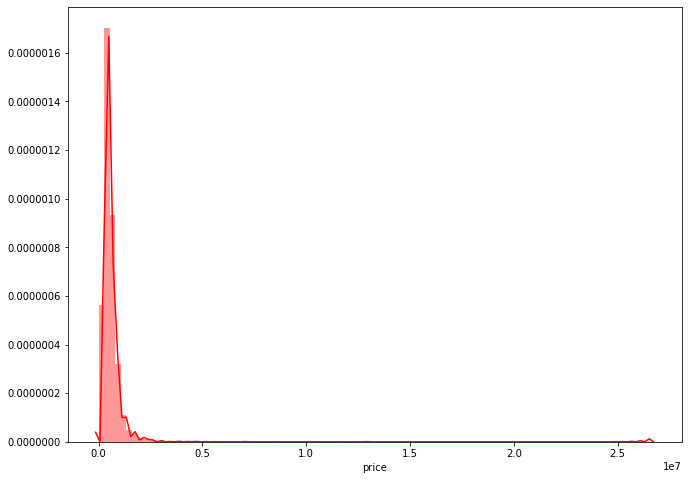

In [18]:
f, ax = plt.subplots(figsize=(11, 8))
sns.distplot(house['price'], color='red', bins=100)

In [20]:
make_dist = house.groupby('city').size()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text xticklabel objects>)

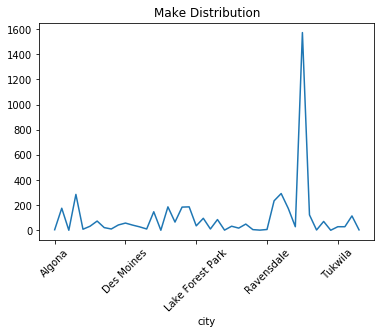

In [22]:
make_dist.plot(title = 'Make Distribution')
plt.xticks(rotation = 45)

In [23]:
house_num = house.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFFE155108>,
      dtype=object)

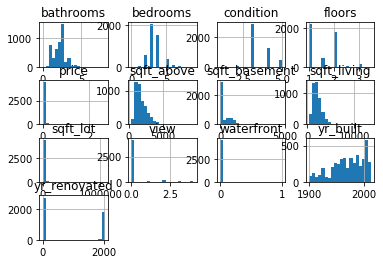

In [25]:
house_num.hist(bins = 20)

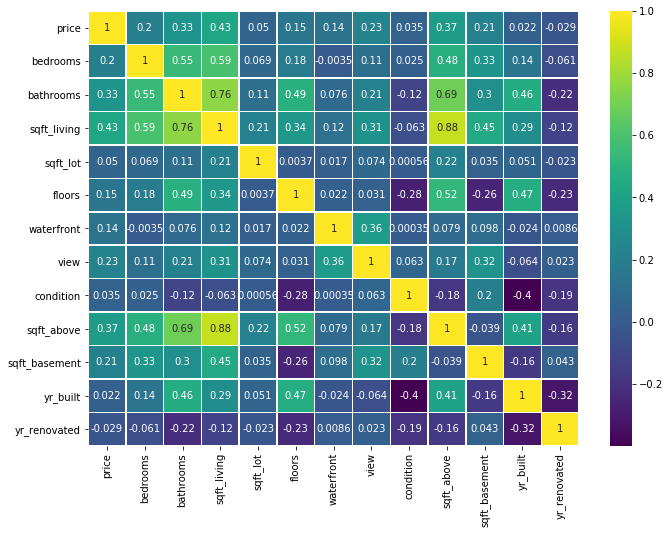

In [26]:
#heat map
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(house_num.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

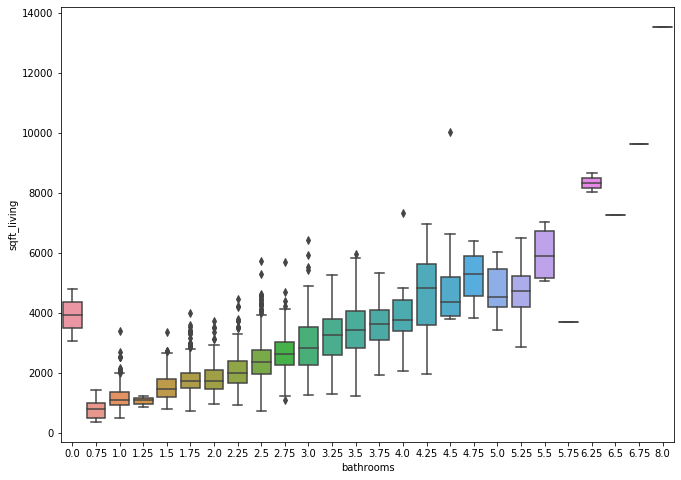

In [35]:
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bathrooms', y= 'sqft_living', data = house_num)
plt.xticks(rotation = 0)
plt.rc('xtick', labelsize= 20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

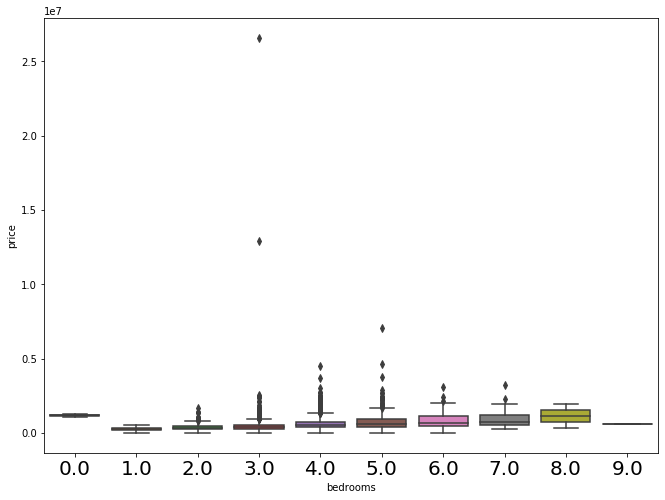

In [37]:
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'price', data = house)
plt.xticks(rotation = 0)

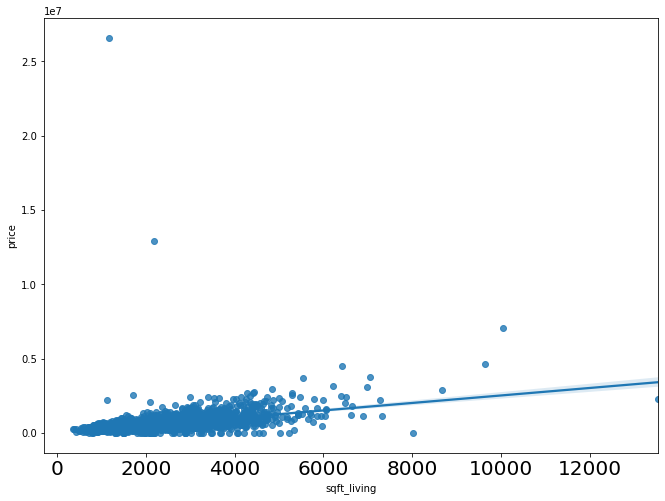

In [41]:
f, ax = plt.subplots(figsize=(11, 8))
sns.regplot(house['sqft_living'], house['price'])